# Classification Heart Disease DataSet using Decision Trees

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import  plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [3]:
# importing dataset from UCI machine learning repository > Heart Disease Dataset > ProcessedClevelandData
df = pd.read_csv('processed.cleveland.data', header=None)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [5]:
 # it is seen that there are no coloun names
    # we now add column names to the dataset, this information were obtained from the UCI website

In [6]:
df.columns = ['age', # patients age
              'sex', # patients sex
              'cp', #chest pain
              'restbp', #resting blood pressure
              'chol', # serum cholesterol in mg/dl
              'fsb' , # fasting blood pressure
              'restecg', #resting electrocardiographic result
              'thatach', #maximum heart rate achived
              'exang', #excercise induced angina
              'oldpeak', #ST depression induced by excercise relative to rest
              'slope', # the slope of the peak excercise ST segment 
              'ca', # number of major vessels (0-3) colored by flouroscopy
              'thal', #thalium scan
              'hd' ] # diagnosis of heart disease

In [7]:
df

,age,sex,cp,restbp,chol,fsb,restecg,thatach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [8]:
# identifying missing data

In [9]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fsb        float64
restecg    float64
thatach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [10]:
# the ca and thal columns indicate object data types, ideally these should be numbers, Hence, This needs to be investigated

In [11]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [12]:
# the numbers 0 to 3 indicate the number of blood vessels that lt up during floroscopy 
# whereas ? represents missing data

In [13]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [14]:
# similar to ca the thal coloumn has numbers representing  different diagnoses from the thalium heart scan
# ? represents missing data


In [16]:
# count out rows containing missing data
len(df.loc[(df['ca']== '?') | (df['thal']== '?')])

6

In [17]:
# print out rows containing missing data
df.loc[(df['ca']== '?') | (df['thal']== '?')]

,age,sex,cp,restbp,chol,fsb,restecg,thatach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [18]:
len(df)

303

In [19]:
# it is seen that only 6 rows in 303 contain missing value, which is very small.
#Hence we will remove the rows with missing values

In [21]:
df_n = df.loc[(df['ca'] != '?' )&
               (df['thal'] != '?')]

In [22]:
df_n

,age,sex,cp,restbp,chol,fsb,restecg,thatach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [23]:
# the result shows 6 fewer rows, thus the rows with missing data has been removed

In [28]:
df_n['ca'].unique()


array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [27]:
df_n['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [29]:
# split data into dependant and independant

X = df_n.drop('hd', axis =1).copy()

In [32]:
y = df_n['hd'].copy()

In [33]:
X

,age,sex,cp,restbp,chol,fsb,restecg,thatach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [35]:
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

# One Hot Encoding

In [36]:
pd.get_dummies(X, columns=['cp']).head() # encode the column cp to 0s and 1s instead of 1,2,3,4

,age,sex,restbp,chol,fsb,restecg,thatach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [37]:
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal']) # to encode the four columns in 0s and 1s

In [38]:
X_encoded.head()

,age,sex,restbp,chol,fsb,thatach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [39]:
# the output variable y has values 0 through 4 
# it does not contain 0=no and 1  = yes

In [40]:
y_non_zero = y >0
y[y_non_zero] =1
y.unique()

array([0, 1], dtype=int64)

In [41]:
# now we have data ready for a classification tree

## Building a Classification Tree

In [42]:
# split the data into train and test:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

In [43]:
# create a decision tree:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

In [ ]:
#Plotting the tree:

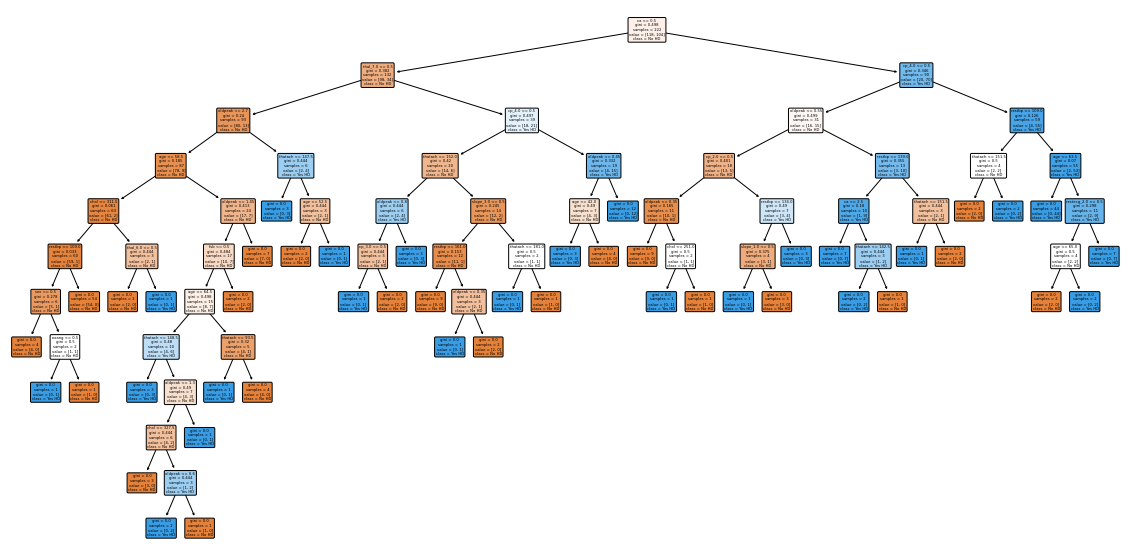

In [44]:
plt.figure(figsize =(20,10))
plot_tree(clf_dt, filled= True, rounded=True, class_names=["No HD", "Yes HD"], feature_names=X_encoded.columns);

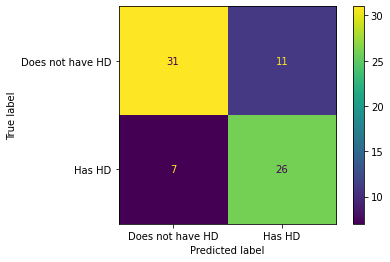

In [45]:
# confusion Matrix
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Does not have HD", "Has HD"])


** the output shows that 31 + 11 = 42 had heart disease and the model classfied  31 correctly ie 74%**
** similarly 7+26 =33 did not have heart disease whereas the model classified26 correctly ie 79%**

In [46]:
# Pruning:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) #determine the values of alpha
ccp_alphas =path.ccp_alphas     #extract different values of alpha
ccp_alphas = ccp_alphas[:-1]    # exclude the maximum value for alpha

clf_dts = [] # create an array that we will put the decision tree into

# create one decision tree per bvalue  for alpha and store it in an array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier( random_state= 42, ccp_alpha= ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

In [47]:
# graph the accuracy of the trees using the training data and testing data


In [50]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

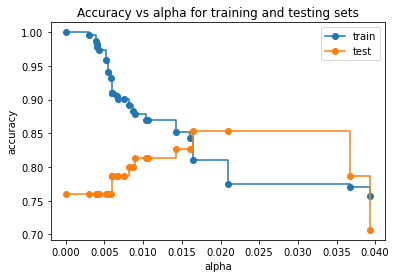

In [53]:
# plot
fig, ax =plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker ='o', label ='train', drawstyle ='steps-post')
ax.plot(ccp_alphas, test_scores, marker ='o', label ='test', drawstyle ='steps-post')
ax.legend()
plt.show()

In [54]:
# the above graph shows blue indiciates training and orange indicates testing
# it is seen that the accuracy of the testing data increase with optimum value of alpha at about 0.016
# after this value of 0.16 the training accuracy drops of significantly suggesting we shpould set ccp_alpha =0.016

In [55]:
clf_ft = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

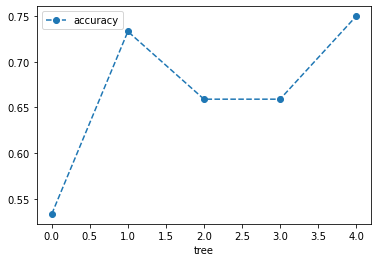

In [58]:
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data ={'tree': range(5), 'accuracy':scores})
df.plot(x='tree', y='accuracy', marker ='o', linestyle="--")

# Perform cross validation

In [66]:
# create an array to store result of each fold during cross validation
alpha_loop_values =[]

# for each candidate value for alpha we will run 5 fold cross validation.
# next we store the mean and std values of scores for each callto cross_val_scores in alpha_loop_values

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

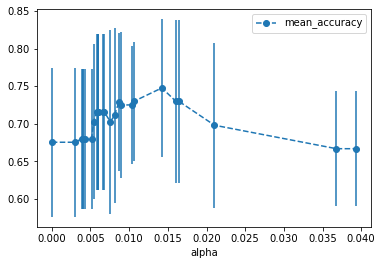

In [67]:
# dra a graph of the means and std of the scoresfor each candidate value of alpha

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                 y = 'mean_accuracy',
                 yerr ='std',
                 marker ='o',
                 linestyle= '--')

In [68]:
##using cross validation we can see that the optimum value of alpha is between 0.014 and 0.015

In [69]:
alpha_results[(alpha_results['alpha']>0.014)
             &
             (alpha_results['alpha']<0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [70]:
# the result shows the ideal value for alpha is 0.014225
# lets store this values to build a decision tree


In [73]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha']>0.014)
             &
             (alpha_results['alpha']<0.015)]['alpha']

In [74]:
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [75]:
# the result shows a series ie 20 being the index and the value of alpha we want
# converting it into serie
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

In [76]:
#Finally we have the value of alpha that we want
# We can now build a decision tree


# Final classification tree

In [77]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha= ideal_ccp_alpha)

clf_dt_pruned =clf_dt_pruned.fit(X_train, y_train)

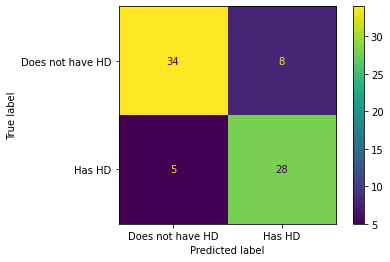

In [78]:
# confusion matrix

plot_confusion_matrix(clf_dt_pruned,
                     X_test,
                     y_test,
                     display_labels=["Does not have HD", "Has HD"])

In [79]:
# The result show that 34 out of 42 are correctly classified as did not have heart disease ie 81%,
#similarly 28 out of 33 are correctly classified as with heart disease ie 85%

In [80]:
#Plotting the decison tree

SyntaxError: invalid syntax (<ipython-input-80-bee80c142a28>, line 1)

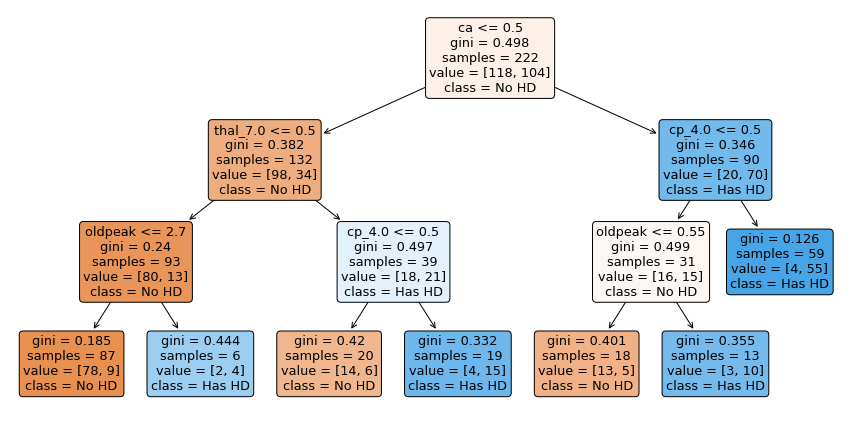

In [82]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned,
         filled = True,
         rounded = True,
         class_names= ["No HD", "Has HD"],
         feature_names = X_encoded.columns);

In [83]:
# The above figure shows a much better pruned decision tree 
# The orange nodes shows the liklehood of not having HD 
# While the blue nodes indicates the likelihood of having HD